Dominik Allen
232487
Machine Learning HW 2

Conceptual

1.

i. In order to minimize the classification error on this test set, we should always choose the value of k which minimizes the training set error.

Answer: False

ii. Instead of choosing the hyperparameters by merely minimizing the
training set error, we instead consider splitting the training-all data set into a training and a validation data set, and choose the hyperparameters that lead to lower validation error. Is choosing hyperparameters based on validation error better than choosing hyper-parameters based on training error?


Answer: Yes, lowering validation error instead of training error is better because lowering training error will not help generalize our model and may lead to overfitting.

2. Which of the following is/are correct statement(s) about kNN models?


Answers: a, c, d 

- A larger k tends to give a smoother decision boundary.
- To reduce the impact of noise or outliers in our data, we should increase the value k.
- We can use cross-validation to help us select the value of k.


3. 

i. What is the training error rate?



Answer: Training error rate = 4/14 = 28.57


Note- however 4 of them have 50 % chance of being correct/false since the euclidean distance is the same for the closest in another group. For example, point [5,1] has the same euclidean distance from [1,5] as it does from [9,5] making it a 50/50 chance to be classified either way.

ii. For which values of k is this test point correctly classified by the kNN algorithm?



Answer: k= 5, k= 9, k= 12

- Note, k= 12 could go either way since all the closest k=12 points equal out to 6 + and 6 - . If choosing the last point randomly to break the tie, we have to (-) point of [7,2] and the (+) point of [5,1] left which would still give a 50% chance of either direction.

4. 

i. How many coefficients (wk) do you need to estimate? When solving for these coefficients, how many equations do you have?



Answer: M coefficients, N equations

ii. What is the expression for each in terms of the dataset



Answer: A


$$
w_k = \frac{\sum_{i=1}^{N} x_k^{(i)} \left(y^{(i)} - \sum_{j=1, j \neq k}^{M} w_j x_j^{(i)} \right)}
{\sum_{i=1}^{N} \left(x_k^{(i)}\right)^2}
$$


5. Explain how w2 compares to w1 and justify.




Answer: w2 = w1. Mean centering data shifts the data and does not scale the coordinates; therefore, it does not change the fitted regression line’s slope.

6. Which of the following are true about logistic regression?


Answers:

- Our formulation of binary logistic regression will work with both continuous and binary features.

- Binary Logistic Regression will form a linear decision boundary in our feature space, assuming no feature engineering.



- Extra note, the sigmoid function is not always convex, but it is convex for value sless than a particular point and concave past that point

7. Suppose we are updating θk with learning rate η, which of the following is the correct expression for the update?

Answer: C

$$
\theta_k \leftarrow \theta_k - \eta \frac{\partial f(\theta)}{\partial \theta_k}
$$
where
$$
\frac{\partial f(\theta)}{\partial \theta_k} = \frac{1}{N} \sum_{i=1}^{N} x_k^{(i)} \left( -y^{(i)} + \frac{\exp(\theta^T x^{(i)})}{1 + \exp(\theta^T x^{(i)})} \right) + \lambda \theta_k
$$


8.

Data is separable in one dimension if there exists a threshold (t) such that all values less than t have one class label and all values greater than or equal to t have the other class label. If you train an unregularized logistic regression model for infinite iterations on training data that is separable in at least one dimension, the corresponding weight(s) can go to infinity in magnitude. What is an explanation for this phenomenon?

The explanation for this is that since there are no penalties in this situation with it being unregularized, the model is going to become more and more confident in its prediction ability which will drive the weigths higher and higher to infinity. This will in turn make the model go towards perfect separation with infinite magnitude.

9. How does regularization (such as l1 and l2) help correct the problem in the previous question?


Answers: 
B: l1 regularization prevents weights from going to infinity by reducing some of the weights to 0, effectively removing some of the features.
C: l2 regularization prevents weights from going to infinity by reducing the value of some of the weights to close to 0 (reducing the effect of a feature but not necessarily removing it).

Applied

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/grf-labs/grf/master/r-package/grf/vignettes/data/bruhn2016.csv"
df = pd.read_csv(url) 
X = np.hstack((
    df["treatment"].values.reshape(-1,1),
    df.iloc[:, 3:].values ))
y = df["outcome.test.score"].values

10.

In [4]:
print(df.columns)

Index(['outcome.test.score', 'treatment', 'school', 'is.female',
       'mother.attended.secondary.school', 'father.attened.secondary.school',
       'failed.at.least.one.school.year', 'family.receives.cash.transfer',
       'has.computer.with.internet.at.home', 'is.unemployed',
       'has.some.form.of.income', 'saves.money.for.future.purchases',
       'intention.to.save.index', 'makes.list.of.expenses.every.month',
       'negotiates.prices.or.payment.methods', 'financial.autonomy.index'],
      dtype='object')


In [5]:
df.head()

,outcome.test.score,treatment,school,is.female,mother.attended.secondary.school,father.attened.secondary.school,failed.at.least.one.school.year,family.receives.cash.transfer,has.computer.with.internet.at.home,is.unemployed,has.some.form.of.income,saves.money.for.future.purchases,intention.to.save.index,makes.list.of.expenses.every.month,negotiates.prices.or.payment.methods,financial.autonomy.index
0,47.367374,0,17018390,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,29.0,0.0,1.0,52.0
1,58.176758,1,33002614,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,41.0,0.0,0.0,27.0
2,56.671661,1,35002914,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,48.0,0.0,1.0,56.0
3,29.079376,0,35908915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,27.0
4,49.563534,1,33047324,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,50.0,0.0,1.0,31.0


In [6]:
df.describe()

,outcome.test.score,treatment,school,is.female,mother.attended.secondary.school,father.attened.secondary.school,failed.at.least.one.school.year,family.receives.cash.transfer,has.computer.with.internet.at.home,is.unemployed,has.some.form.of.income,saves.money.for.future.purchases,intention.to.save.index,makes.list.of.expenses.every.month,negotiates.prices.or.payment.methods,financial.autonomy.index
count,17299.000000,17299.000000,1.729900e+04,15661.000000,15440.000000,15350.000000,15386.000000,15550.000000,15422.000000,16510.000000,16525.000000,16210.000000,15396.000000,16364.000000,16237.000000,15363.000000
mean,58.415408,0.514134,3.254108e+07,0.556797,0.429663,0.394984,0.288379,0.343023,0.546168,0.339915,0.654281,0.151080,48.625682,0.103703,0.759561,49.289071
std,14.735654,0.499815,7.715811e+06,0.496779,0.495044,0.488863,0.453023,0.474734,0.497880,0.473694,0.475616,0.358137,18.639525,0.304885,0.427363,19.619816
min,22.316839,0.000000,1.700039e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,-33.000000
25%,47.220957,0.000000,3.106869e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,1.000000,37.000000
50%,58.822483,1.000000,3.309356e+07,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,49.000000,0.000000,1.000000,50.000000
75%,69.214005,1.000000,3.503599e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,62.000000,0.000000,1.000000,62.000000
max,100.000000,1.000000,5.306818e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,94.000000


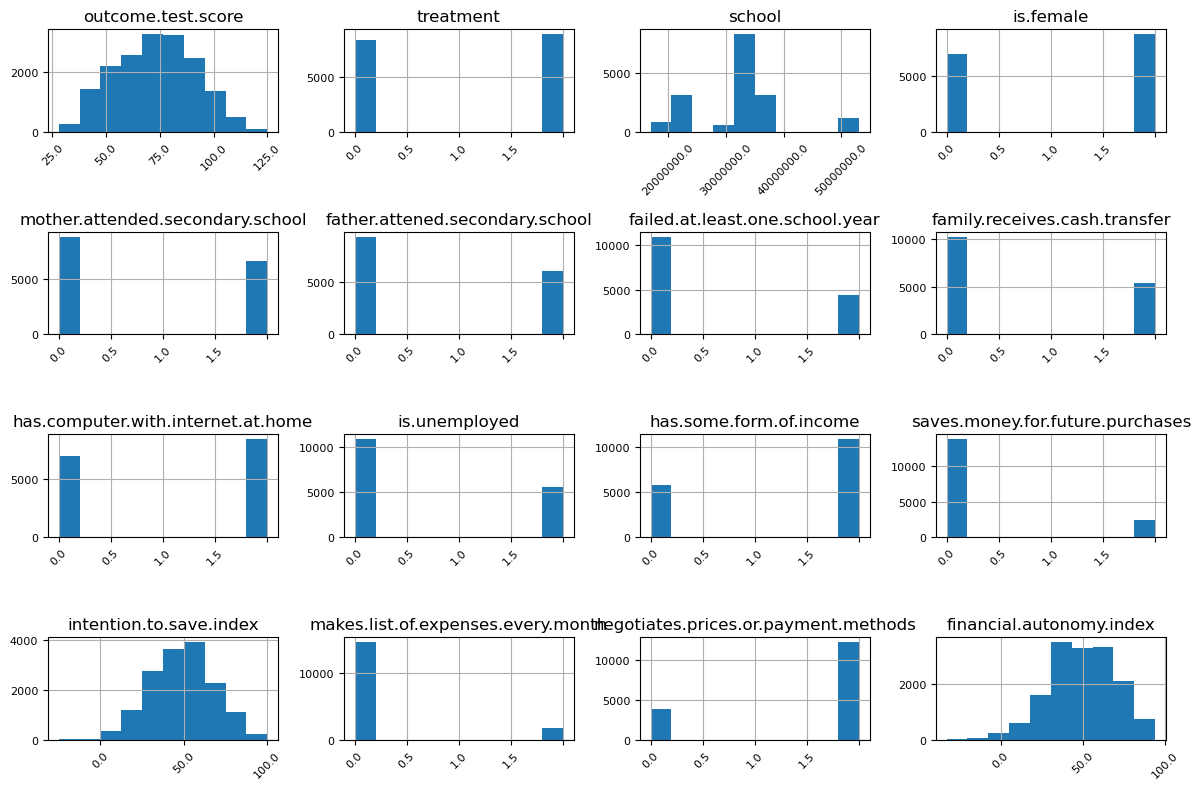

In [27]:

import warnings
warnings.filterwarnings("ignore")
histos = df.hist(bins=10, xlabelsize=8, ylabelsize=8, figsize=(12, 8))  # Increase figure size

for ax in histos.flatten():
    ax.set_xticklabels(ax.get_xticks(), rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

<Axes: >

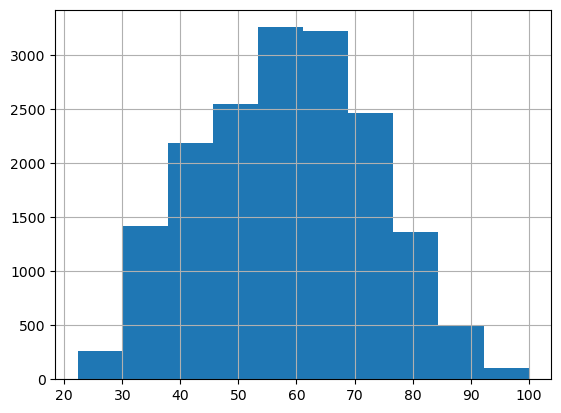

In [8]:
df['outcome.test.score'].hist(bins=10)

In [9]:
print("\nMissing values count per column:\n", df.isnull().sum())


Missing values count per column:
 outcome.test.score                         0
treatment                                  0
school                                     0
is.female                               1638
mother.attended.secondary.school        1859
father.attened.secondary.school         1949
failed.at.least.one.school.year         1913
family.receives.cash.transfer           1749
has.computer.with.internet.at.home      1877
is.unemployed                            789
has.some.form.of.income                  774
saves.money.for.future.purchases        1089
intention.to.save.index                 1903
makes.list.of.expenses.every.month       935
negotiates.prices.or.payment.methods    1062
financial.autonomy.index                1936
dtype: int64


Throught this exploratory analysis we can see that there are 16 different columns, with most of the features being binary except for outcome, school, intention to save, and financial autonomy. In total there are 17299 observations. The distribution of the outcome of test scoress appears to show the average score is around 58% with the minimum and maximum scores being 22 and 100 respectively. There is missingness in the data as shown by the previous table.

11. 

In [10]:
X = df[['treatment', 'is.female', 'mother.attended.secondary.school', 'father.attened.secondary.school',  'failed.at.least.one.school.year', 'family.receives.cash.transfer', 'has.computer.with.internet.at.home', 'is.unemployed', 'has.some.form.of.income', 'saves.money.for.future.purchases', 'intention.to.save.index', 'makes.list.of.expenses.every.month', 'negotiates.prices.or.payment.methods', 'financial.autonomy.index']].values
y = df['outcome.test.score']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=50)


12. from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

def create_ridge_pipeline(regularization_strength):
    """
    Creates a pipeline and fits a ridge regression model with the provided regularization strength.

    Parameters:
    - regularization_strength: the alpha parameter for Ridge regression to control regularization.

    Returns:
    - A pipeline that performs the steps in sequence.
    """
    return make_pipeline(
        SimpleImputer(strategy='mean'),  
        StandardScaler(),  
        Ridge(alpha=regularization_strength)  
    )


13.

In [13]:
#use function with 0.1 strength
ridge_pipeline = create_ridge_pipeline(regularization_strength= 0.1)

# fit pipeline on whole training dataset
ridge_pipeline.fit(X_train, y_train)



Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

In [14]:
# My prediction
y_pred = ridge_pipeline.predict(X_test)
y_pred

array([59.3036928 , 57.4029661 , 54.66120489, ..., 58.97686778,
       54.98206521, 64.69368126])

14.

In [15]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle= True, random_state=50)

15.

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import make_pipeline

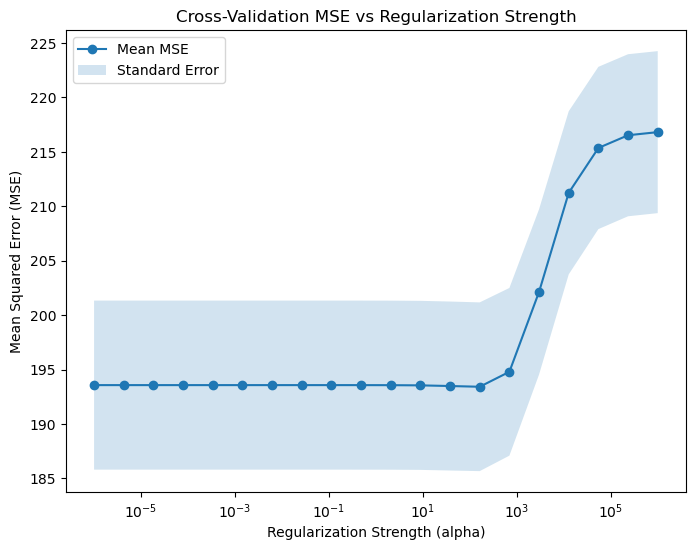

In [17]:
alphas = np.logspace(-6, 6, num=20, base=10)  # 20 values between 10^-6 and 10^6

mean_mse = []
std_mse = []

# Loop through each alpha value
for alpha in alphas:
    model = create_ridge_pipeline(alpha)
    
    # Perform cross-validation to estimate MSE for the current alpha
    mse_scores = cross_val_score(
        model, X_train, y_train, cv=cv, scoring=make_scorer(mean_squared_error)
    )
    
    # Calculate the mean and standard error of MSE
    mean_mse.append(np.mean(mse_scores))
    std_mse.append(np.std(mse_scores) / np.sqrt(mse_scores.shape[0]))  

# Convert to arrays for easier plotting
mean_mse = np.array(mean_mse)
std_mse = np.array(std_mse)

# Plot 
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_mse, label="Mean MSE", marker='o')
plt.fill_between(alphas, mean_mse - std_mse, mean_mse + std_mse, alpha=0.2, label="Standard Error")
plt.xscale('log')  
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation MSE vs Regularization Strength')
plt.legend()
plt.show()

#Used GPT to assist with creation of for loop

16. 

Based on these results, I would choose the 10^4 Alpha strength for my model since it demonstrates that its generalization performance is relatively good as it isn't under or overfitting, while also being stable enough (as seen by the standard error).

17.

In [18]:
from sklearn.linear_model import Lasso
def create_lasso_pipeline(regularization_strength):
    """Create pipeline for lasso regression with provided regularization strength."""
    return make_pipeline(
        SimpleImputer(strategy='mean'),  
        StandardScaler(),  
        Lasso(alpha=regularization_strength)  
    )


18.

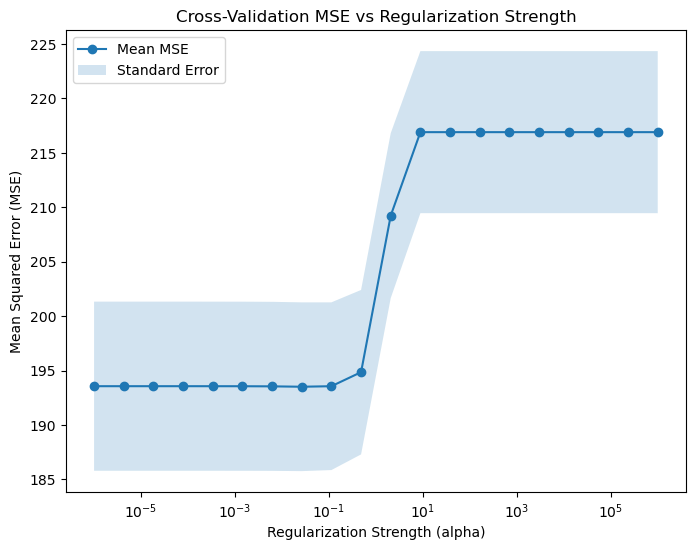

In [19]:
alphas = np.logspace(-6, 6, num=20, base=10)  # 20 values between 10^-6 and 10^6

mean_mse = []
std_mse = []

# Loop through each alpha value
for alpha in alphas:
    model = create_lasso_pipeline(alpha)
    
    # Perform cross-validation to estimate MSE for the current alpha
    mse_scores = cross_val_score(
        model, X_train, y_train, cv=cv, scoring=make_scorer(mean_squared_error)
    )
    
    # Calculate the mean and standard error of MSE
    mean_mse.append(np.mean(mse_scores))
    std_mse.append(np.std(mse_scores) / np.sqrt(mse_scores.shape[0]))  
# Convert to arrays for easier plotting
mean_mse = np.array(mean_mse)
std_mse = np.array(std_mse)

# Plot 
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_mse, label="Mean MSE", marker='o')
plt.fill_between(alphas, mean_mse - std_mse, mean_mse + std_mse, alpha=0.2, label="Standard Error")
plt.xscale('log')  # Log scale for x-axis (alpha values)
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation MSE vs Regularization Strength')
plt.legend()
plt.show()

19.

In [20]:
# Set up the log-spaced grid of regularization parameters
alphas = np.logspace(-6, 6, num=20, base=10)

# Find best alpha for ridge
ridge_mse = []
for alpha in alphas:
    model = create_ridge_pipeline(alpha)
    mse_scores = cross_val_score(
        model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error)
    )
    ridge_mse.append(np.mean(mse_scores))

best_alpha_ridge = alphas[np.argmin(ridge_mse)]
print(f"Best alpha for Ridge: {best_alpha_ridge}")

# Find best alpha for lasso
lasso_mse = []
for alpha in alphas:
    model = create_lasso_pipeline(alpha)
    mse_scores = cross_val_score(
        model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error)
    )
    lasso_mse.append(np.mean(mse_scores))

best_alpha_lasso = alphas[np.argmin(lasso_mse)]
print(f"Best alpha for Lasso: {best_alpha_lasso}")

Best alpha for Ridge: 162.37767391887175
Best alpha for Lasso: 0.11288378916846883


In [21]:
# Train and evaluate Ridge
ridge_model = create_ridge_pipeline(best_alpha_ridge)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Train and evaluate Lasso
lasso_model = create_lasso_pipeline(best_alpha_lasso)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Test set MSE for Ridge model: {mse_ridge}")
print(f"Test set MSE for Lasso model: {mse_lasso}")

# Compare 
if mse_ridge < mse_lasso:
    print("Ridge regression performs better on the test set.")
else:
    print("Lasso regression performs better on the test set.")

Test set MSE for Ridge model: 189.6301987648215
Test set MSE for Lasso model: 189.446375594422
Lasso regression performs better on the test set.
